**7.1 Что такое seaborn**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')

In [3]:
df = pd.read_csv('wage-data-coast.csv')
df.head()
print(df)

      Year          State    Salary  IsCoastal
0     1968        Alabama   0.00000          0
1     1968         Alaska   2.10000          1
2     1968        Arizona   0.66000          0
3     1968       Arkansas   0.15625          0
4     1968     California   1.65000          1
...    ...            ...       ...        ...
2745  2017       Virginia   7.25000          1
2746  2017     Washington  11.00000          1
2747  2017  West Virginia   8.75000          0
2748  2017      Wisconsin   7.25000          0
2749  2017        Wyoming   5.15000          0

[2750 rows x 4 columns]


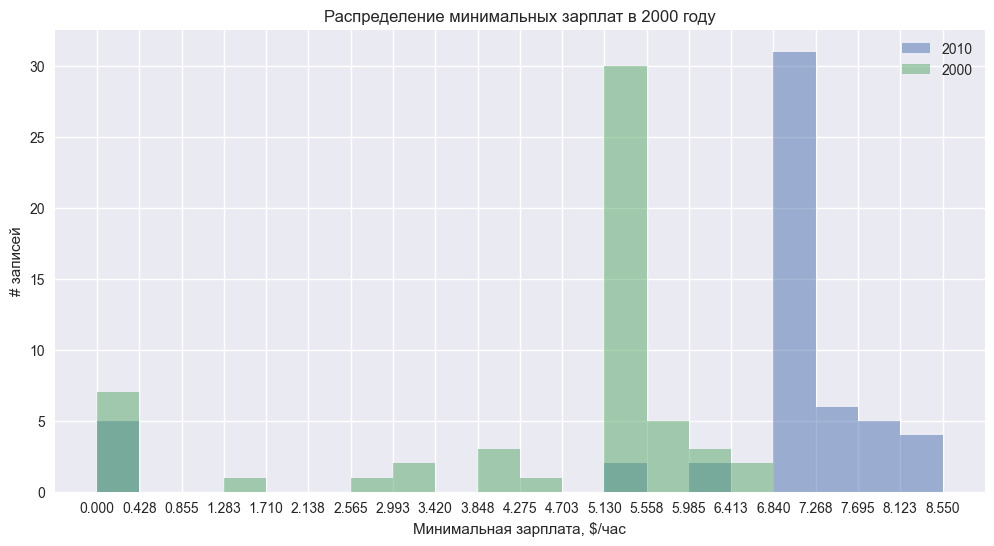

In [4]:

data = df[df['Year'] == 2000]['Salary']
data1 = df[df['Year'] == 2010]['Salary']

fig, ax = plt.subplots(figsize=(12,6))
_, bins, _ = ax.hist(data1, bins = 20, label='2010', alpha=0.5)
ax.hist(data, bins = bins, label='2000', alpha=0.5)


ax.set_title('Распределение минимальных зарплат в 2000 году')
ax.set_xlabel('Минимальная зарплата, $/час')
ax.set_ylabel('# записей')
ax.set_xticks(list(bins))
ax.legend()
    
plt.show()

Text(0, 0.5, '# записей')

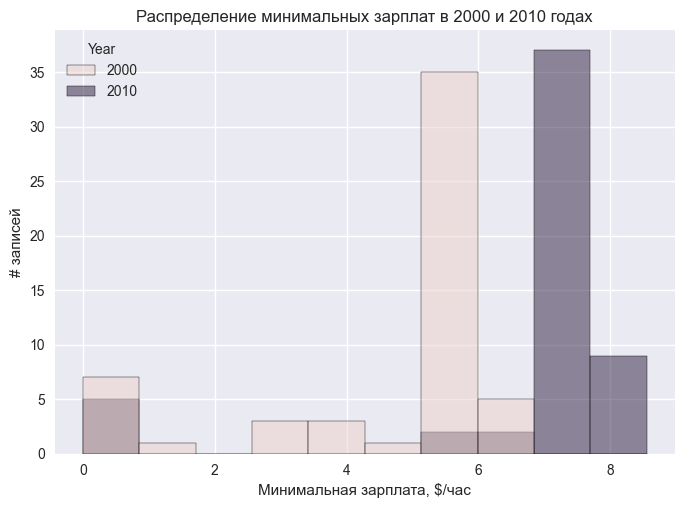

In [5]:
data = df[df['Year'].isin([2000,2010])]
ax = sns.histplot(data=data, x='Salary', hue='Year')
ax.set_title('Распределение минимальных зарплат в 2000 и 2010 годах')
ax.set_xlabel('Минимальная зарплата, $/час')
ax.set_ylabel('# записей')

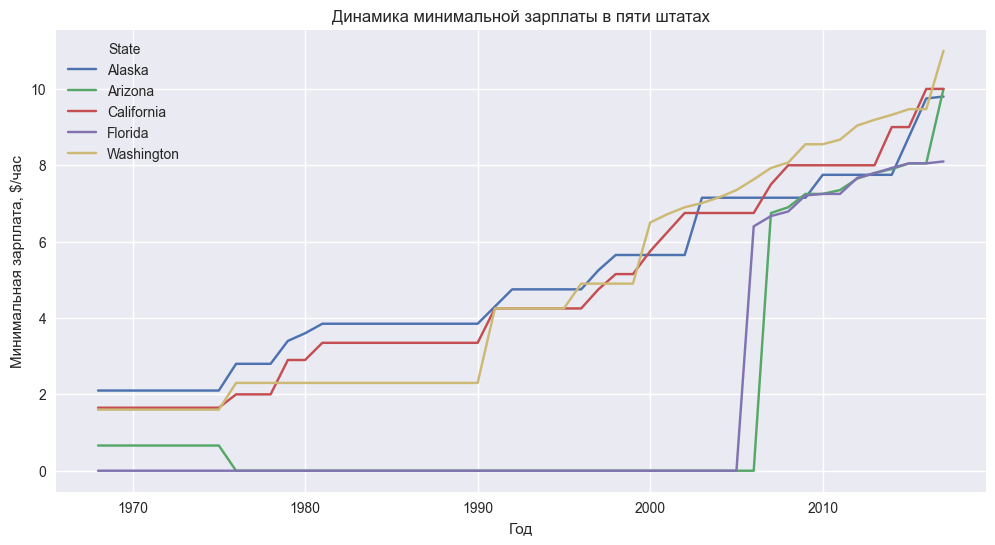

In [6]:
data = df[df['State'].isin(['Alaska', 'California', 'Washington', 'Arizona', 'Florida'])]

fig, ax = plt.subplots(figsize = (12,6))
sns.lineplot(data=data, x='Year', y='Salary', hue='State', ax=ax)

ax.set_title('Динамика минимальной зарплаты в пяти штатах')
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная зарплата, $/час')

plt.show()

**Урок 1. Что такое seaborn**<br>
Практика<br>
Задание 1<br>
С помощью seaborn постройте 2 гистограммы распределения минимальных зарплат в 2000 году. Первая гистограмма должна показывать распределение зарплат в прибрежных штатах, а вторая - во внутренних. Гистограммы нужно построить в одних координатных осях.

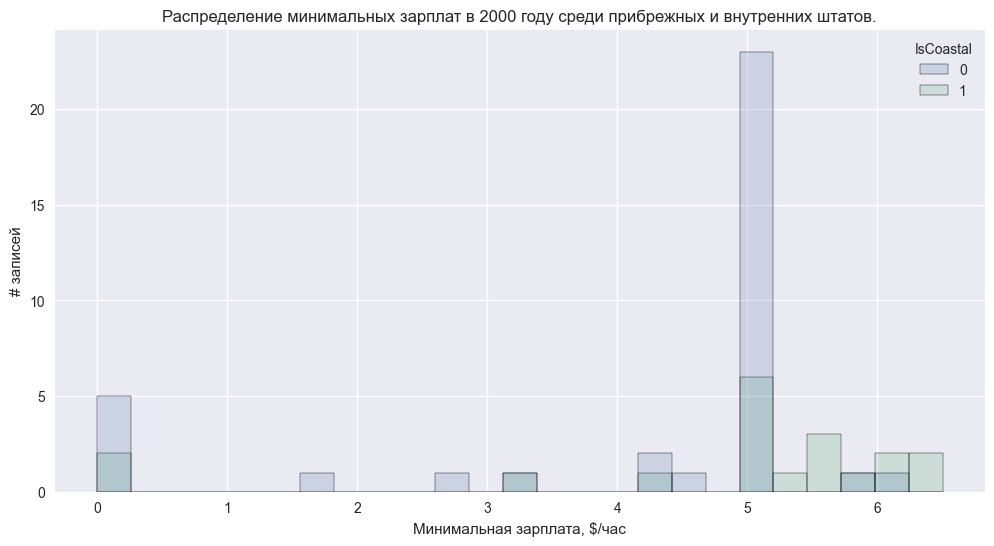

In [7]:
data = df[df['Year'] == 2000]
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(data=data, x='Salary', hue='IsCoastal', ax=ax, alpha = 0.2, bins = 25)

ax.set_title('Распределение минимальных зарплат в 2000 году среди прибрежных и внутренних штатов.')
ax.set_xlabel('Минимальная зарплата, $/час')
ax.set_ylabel('# записей')

plt.show()

**Урок 2. Построение основных графиков с seaborn**

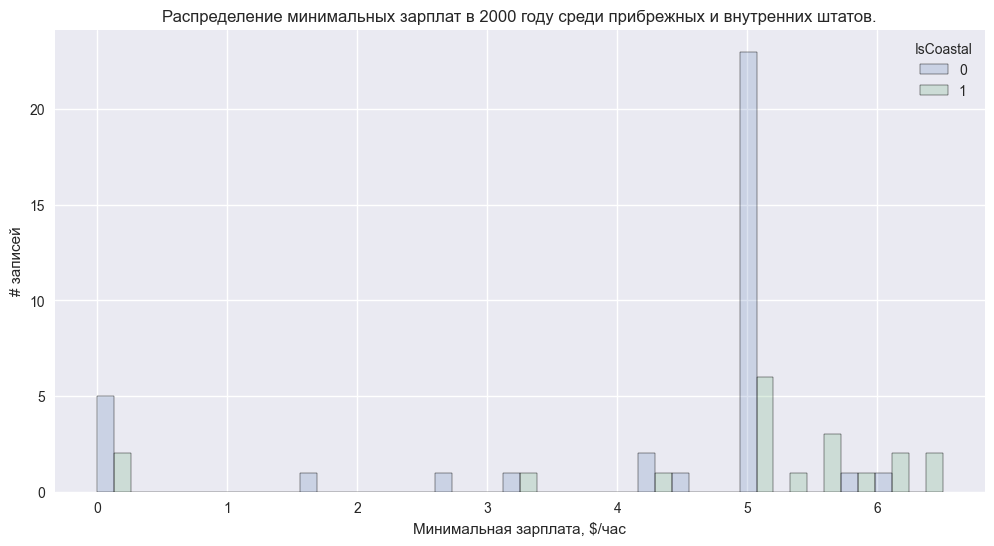

In [8]:
data = df[df['Year'] == 2000]
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(data=data, x='Salary', hue='IsCoastal', ax=ax, alpha = 0.2, bins = 25, multiple='dodge')

ax.set_title('Распределение минимальных зарплат в 2000 году среди прибрежных и внутренних штатов.')
ax.set_xlabel('Минимальная зарплата, $/час')
ax.set_ylabel('# записей')

plt.show()

In [9]:
df = pd.read_csv('wage-data-coast-with-population.csv')
data = df[df['State'].isin(['Alaska', 'California', 'Washington', 'Arizona', 'Florida'])]

df_t = data[data['Year'] == 2017][['State', 'Population']].sort_values('Population')
df_t.loc[:, 'Size'] = list(range(1, df_t.shape[0] + 1))

data1 = data.merge(df_t[['State', 'Size']], how='left', on='State')
data1


,Year,State,Population,Salary,IsCoastal,Size
0,1969,Alaska,294290.0,2.10,1,1
1,1969,Arizona,1702945.0,0.66,0,2
2,1969,California,19745905.0,1.65,1,5
3,1969,Florida,6567950.0,0.00,1,4
4,1969,Washington,3392905.0,1.60,1,3
...,...,...,...,...,...,...
240,2017,Alaska,739786.0,9.80,1,1
241,2017,Arizona,7048876.0,10.00,0,2
242,2017,California,39399349.0,10.00,1,5
243,2017,Florida,20976812.0,8.10,1,4


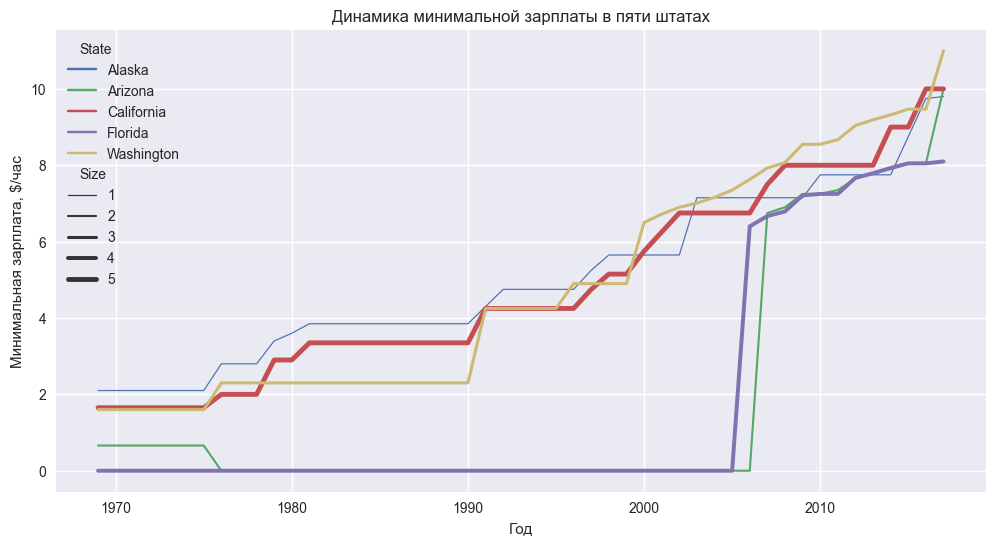

In [10]:
fig, ax = plt.subplots(figsize = (12,6))
sns.lineplot(data=data1, x='Year', y='Salary', hue='State', ax=ax,  size='Size')

ax.set_title('Динамика минимальной зарплаты в пяти штатах')
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная зарплата, $/час')

plt.show()

In [11]:
df = pd.read_csv('wage-data-coast-with-population.csv')

In [12]:
print(df)

      Year          State  Population    Salary  IsCoastal
0     1969        Alabama   3411770.0   0.00000          0
1     1969         Alaska    294290.0   2.10000          1
2     1969        Arizona   1702945.0   0.66000          0
3     1969       Arkansas   1893768.0   0.15625          0
4     1969     California  19745905.0   1.65000          1
...    ...            ...         ...       ...        ...
2494  2017       Virginia   8465207.0   7.25000          1
2495  2017     Washington   7425432.0  11.00000          1
2496  2017  West Virginia   1817048.0   8.75000          0
2497  2017      Wisconsin   5792051.0   7.25000          0
2498  2017        Wyoming    578934.0   5.15000          0

[2499 rows x 5 columns]


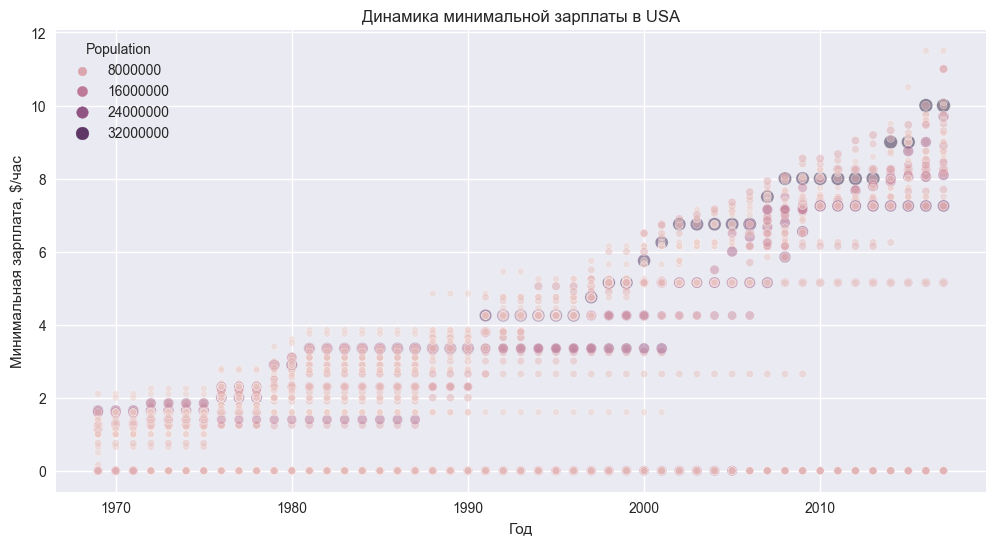

In [13]:
data = df

fig, ax = plt.subplots(figsize = (12,6))
sns.scatterplot(data=data, x='Year', y='Salary', ax=ax, hue='Population', alpha=0.5, size='Population')

ax.set_title('Динамика минимальной зарплаты в USA')
ax.set_xlabel('Год')
ax.set_ylabel('Минимальная зарплата, $/час')

plt.show()

C:\Windows\Temp\ipykernel_8416\2919281608.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='IsCoastal', y='Salary', ax=ax, ci=None, hue='Year')


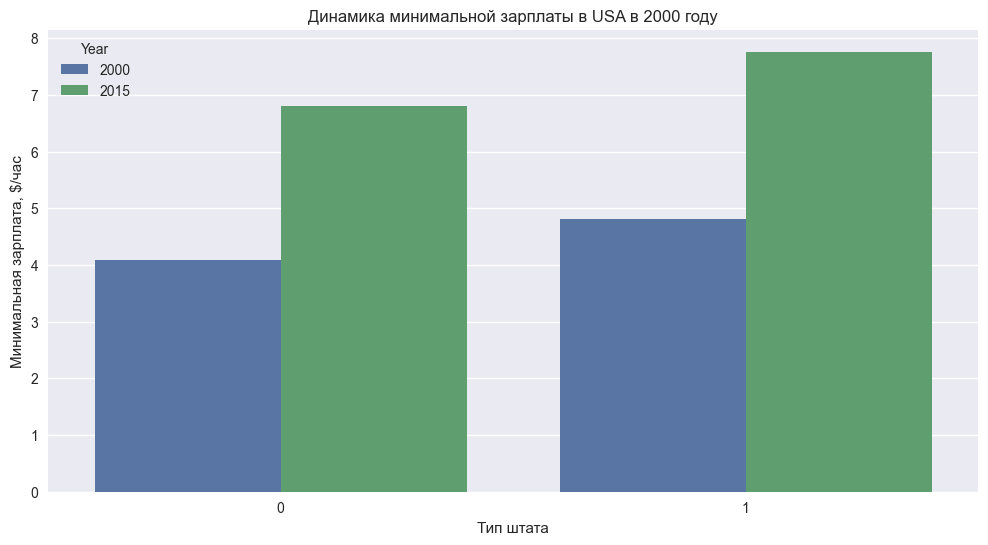

In [14]:
data = df[df['Year'].isin([2000,2015])]

fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=data, x='IsCoastal', y='Salary', ax=ax, ci=None, hue='Year')

ax.set_title('Динамика минимальной зарплаты в USA в 2000 году')
ax.set_xlabel('Тип штата')
ax.set_ylabel('Минимальная зарплата, $/час')

plt.show()

**Урок 3. Построение составных графиков с seaborn**

In [15]:
df = pd.read_csv('wage-data-coast-with-population.csv')
df

,Year,State,Population,Salary,IsCoastal
0,1969,Alabama,3411770.0,0.00000,0
1,1969,Alaska,294290.0,2.10000,1
2,1969,Arizona,1702945.0,0.66000,0
3,1969,Arkansas,1893768.0,0.15625,0
4,1969,California,19745905.0,1.65000,1
...,...,...,...,...,...
2494,2017,Virginia,8465207.0,7.25000,1
2495,2017,Washington,7425432.0,11.00000,1
2496,2017,West Virginia,1817048.0,8.75000,0
2497,2017,Wisconsin,5792051.0,7.25000,0


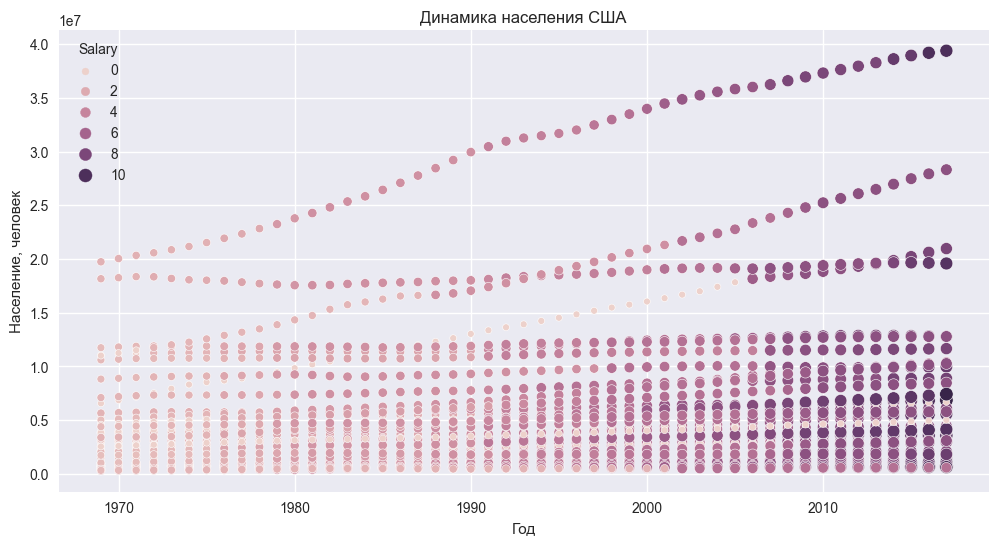

In [16]:
fig, ax = plt.subplots(figsize=(12,6))

sns.scatterplot(data=df, x='Year', y='Population', hue='Salary', size='Salary', ax=ax)


ax.set_title('Динамика населения США')
ax.set_xlabel('Год')
ax.set_ylabel('Население, человек')

plt.show()

In [17]:
df = sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


depth = 2 * z / ( x + y ) * 100 %

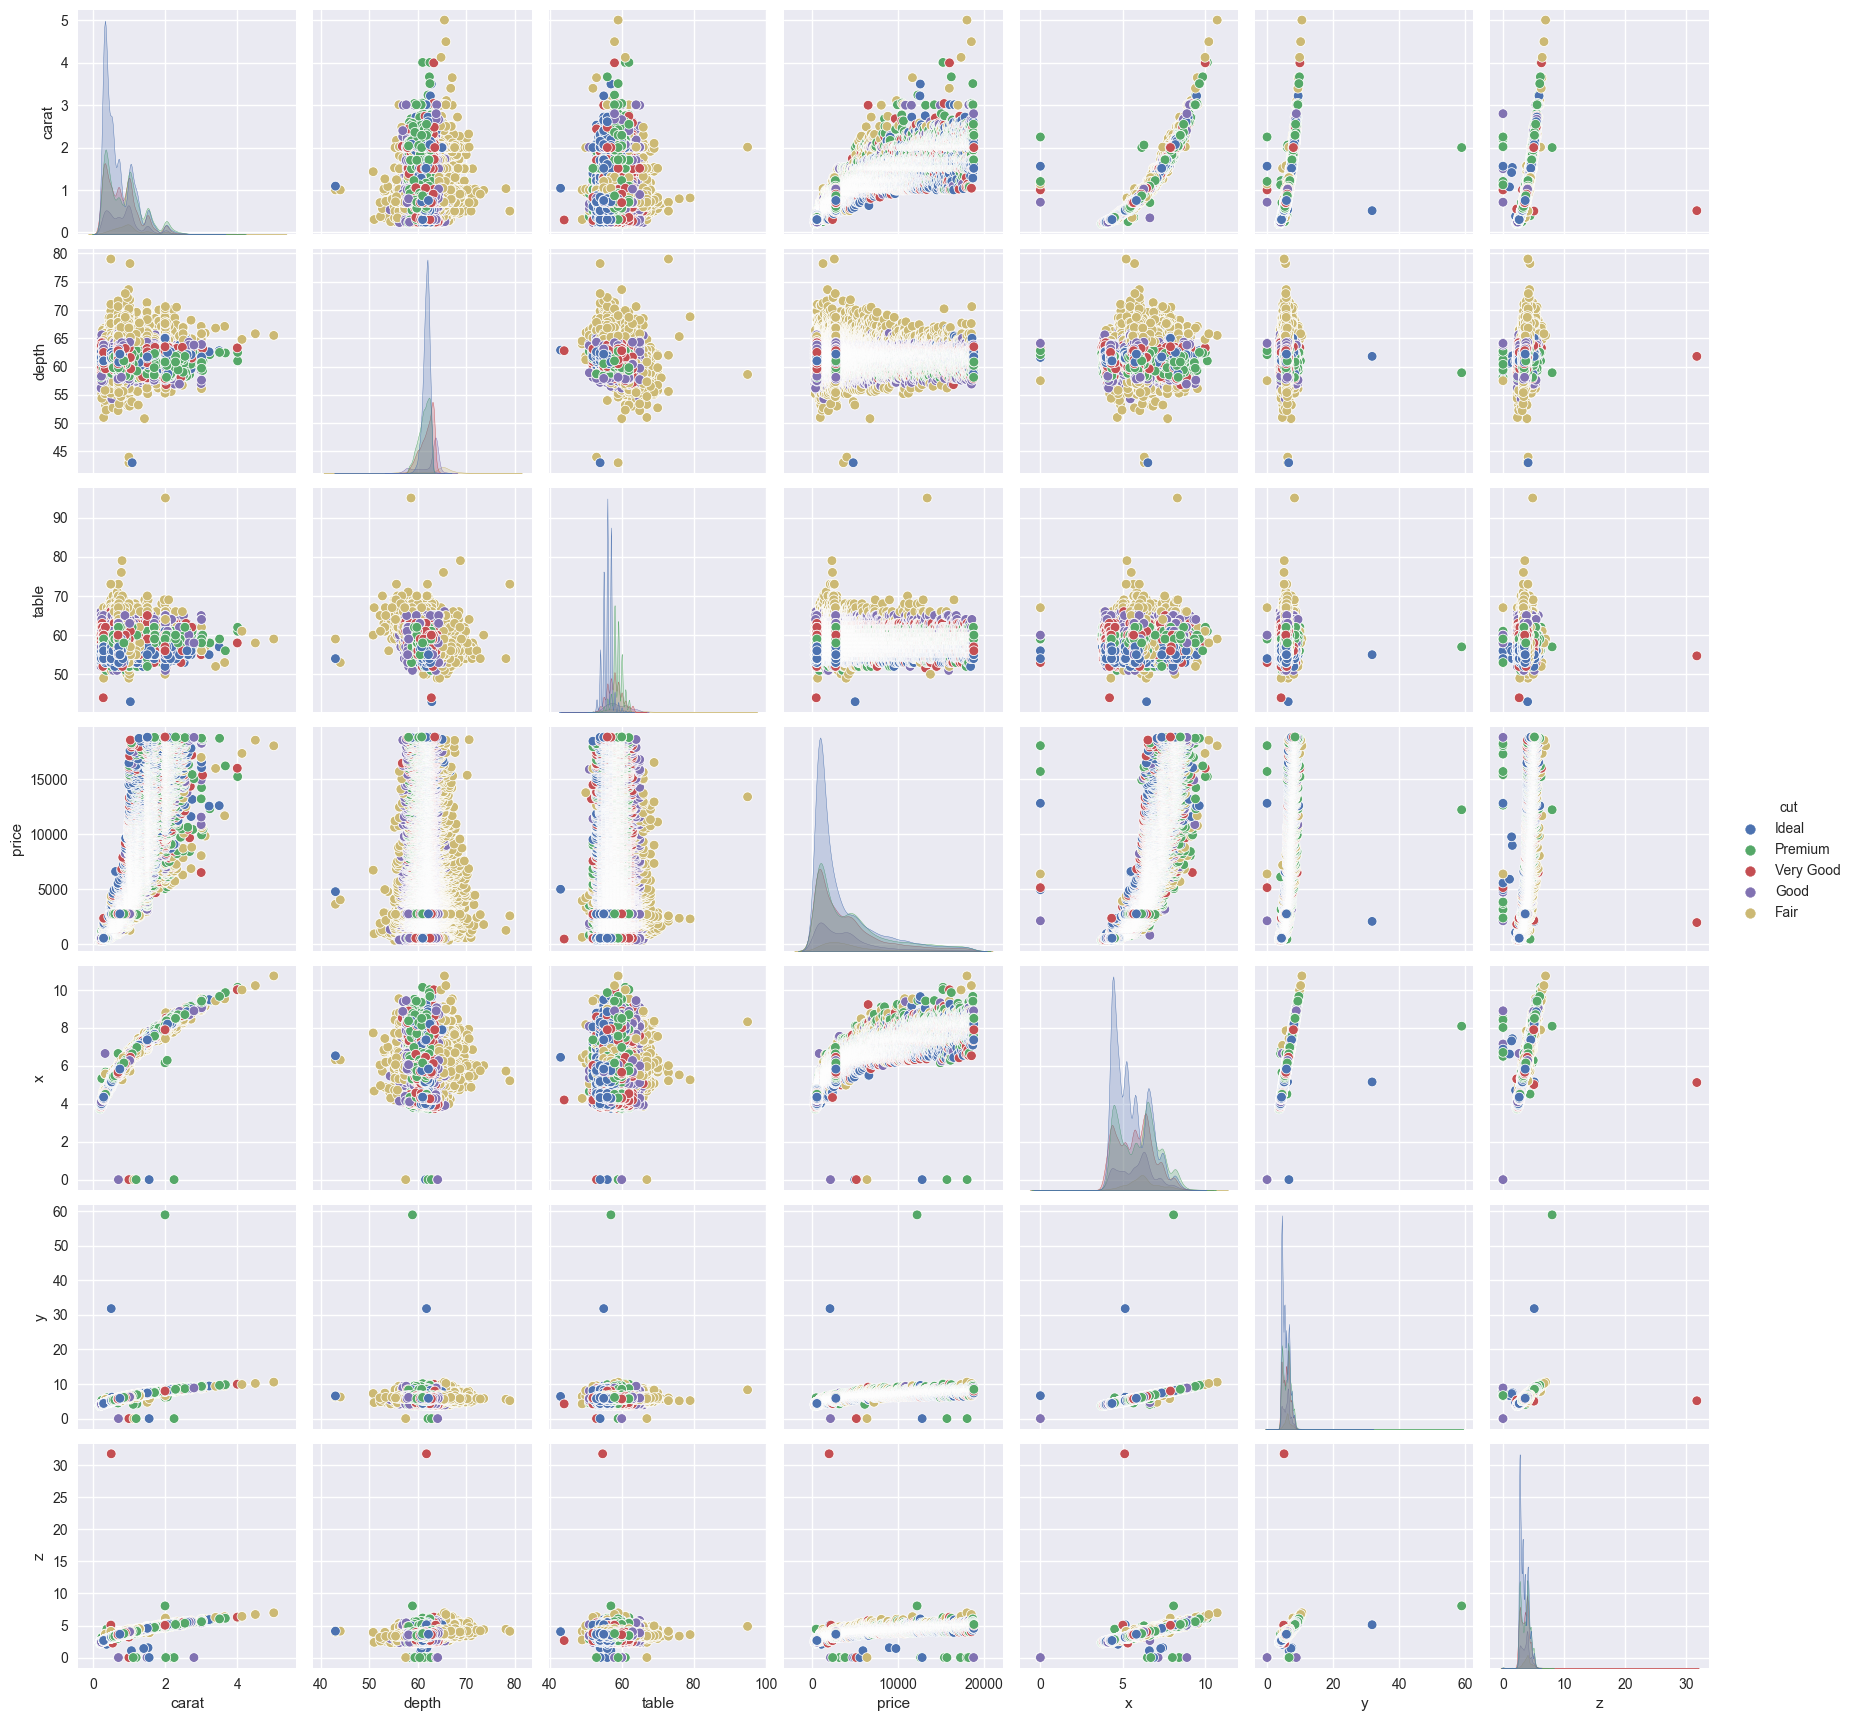

In [21]:
sns.pairplot(df, hue='cut')

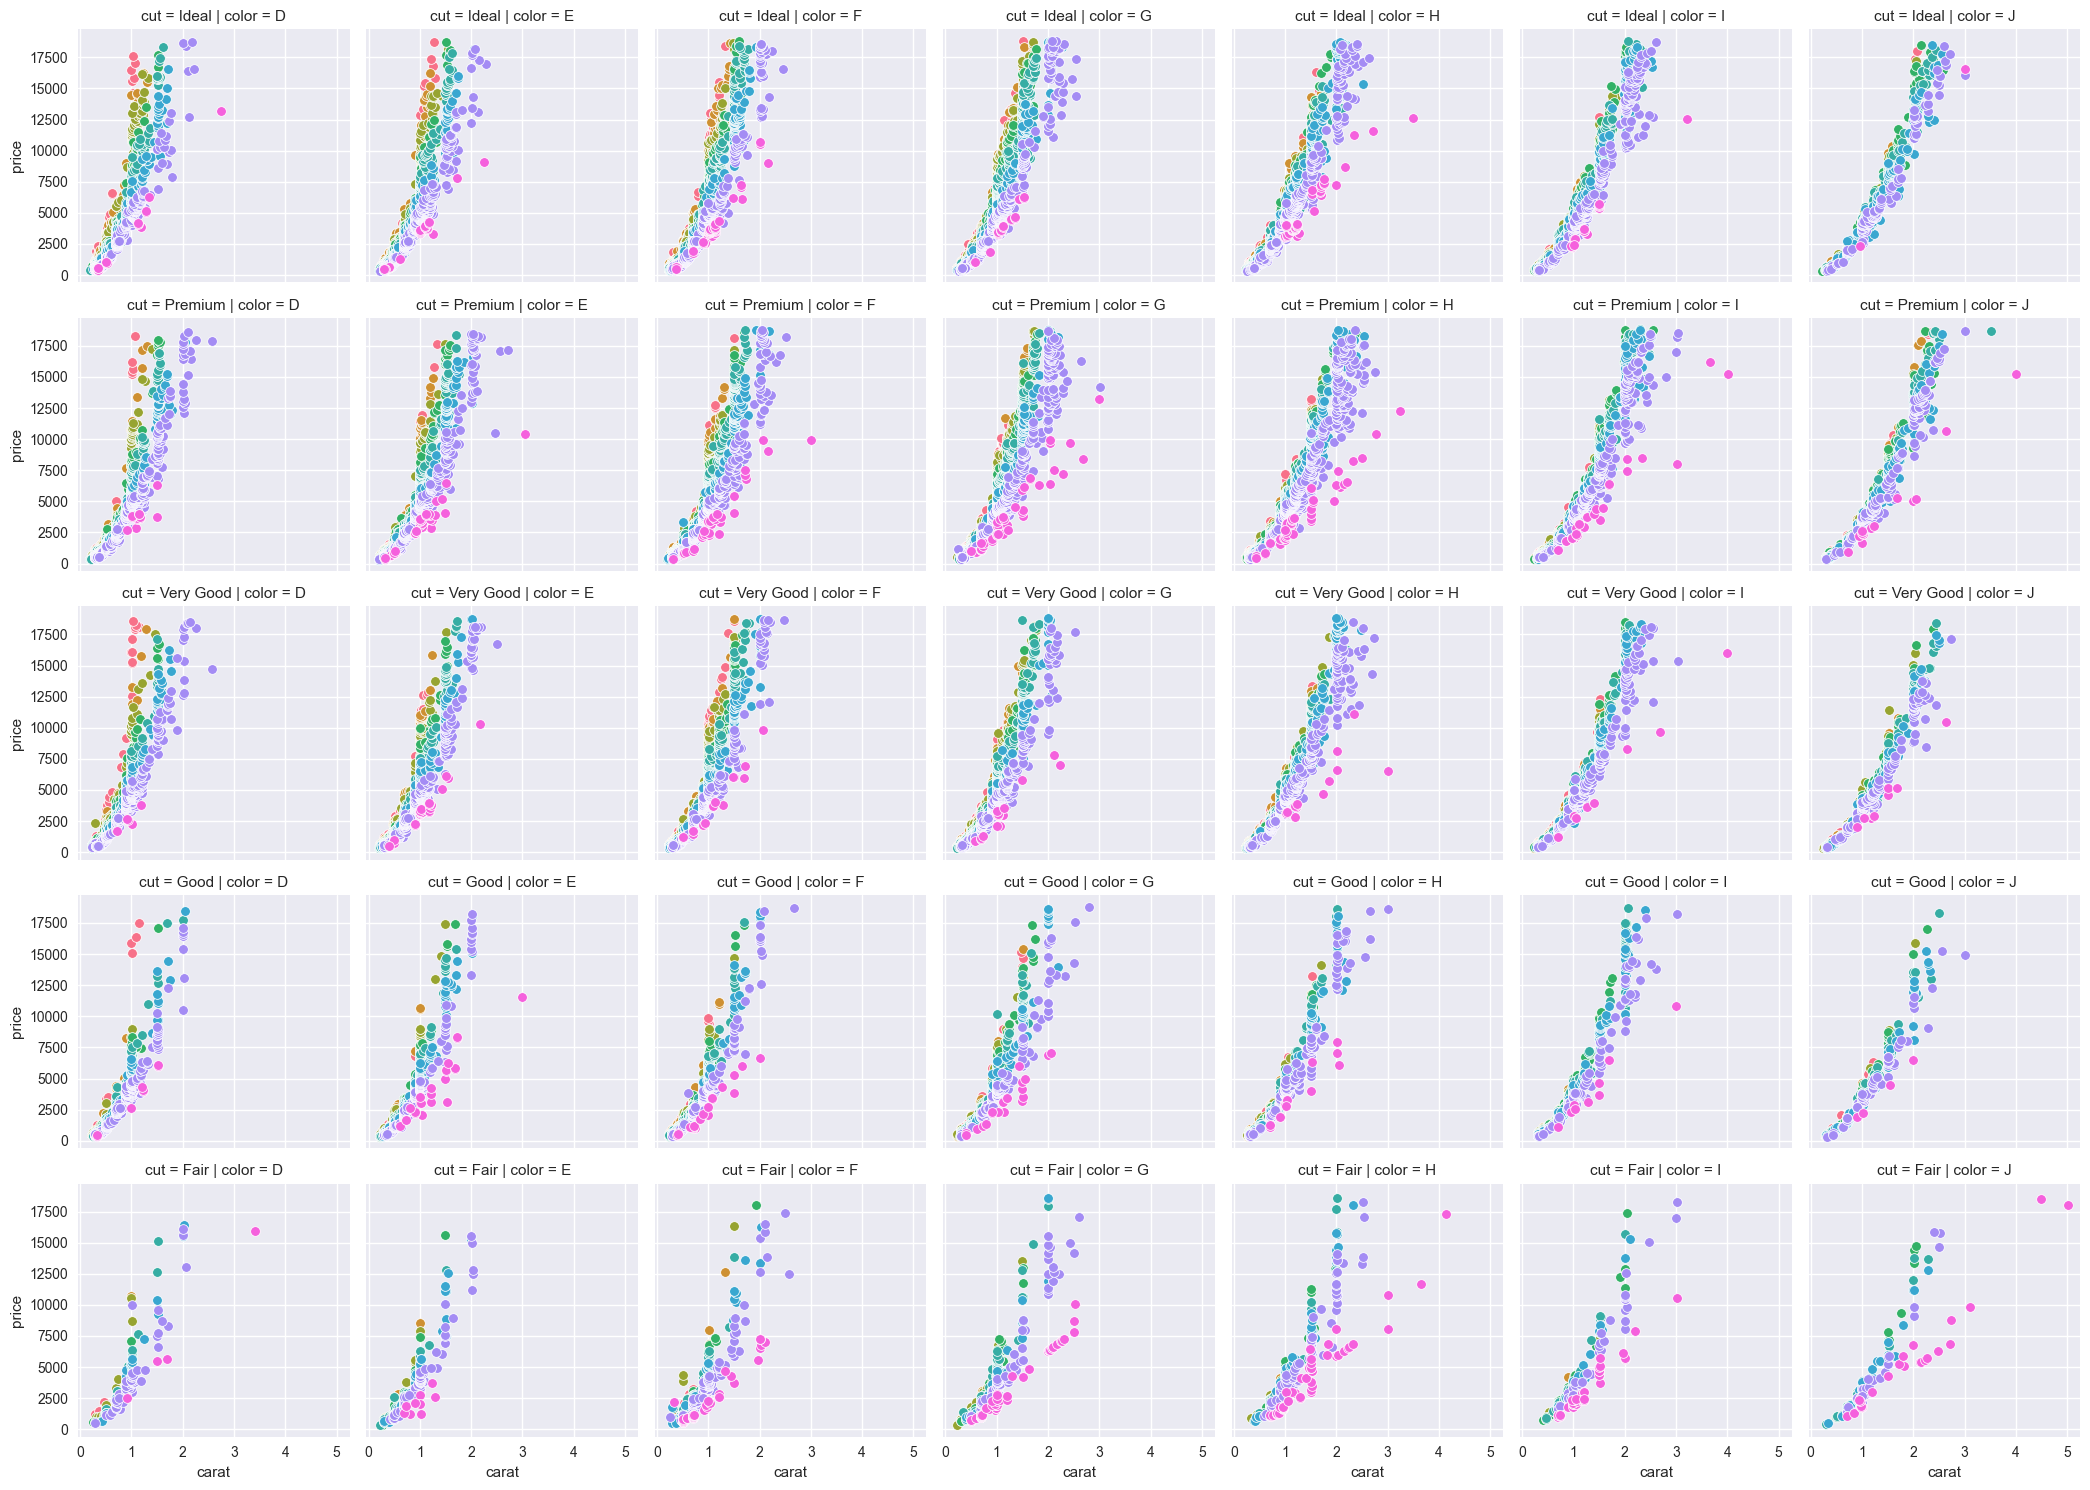

In [ ]:
g = sns.FacetGrid(df, row='cut', col='color', hue='clarity')
g.map(sns.scatterplot, 'carat', 'price')

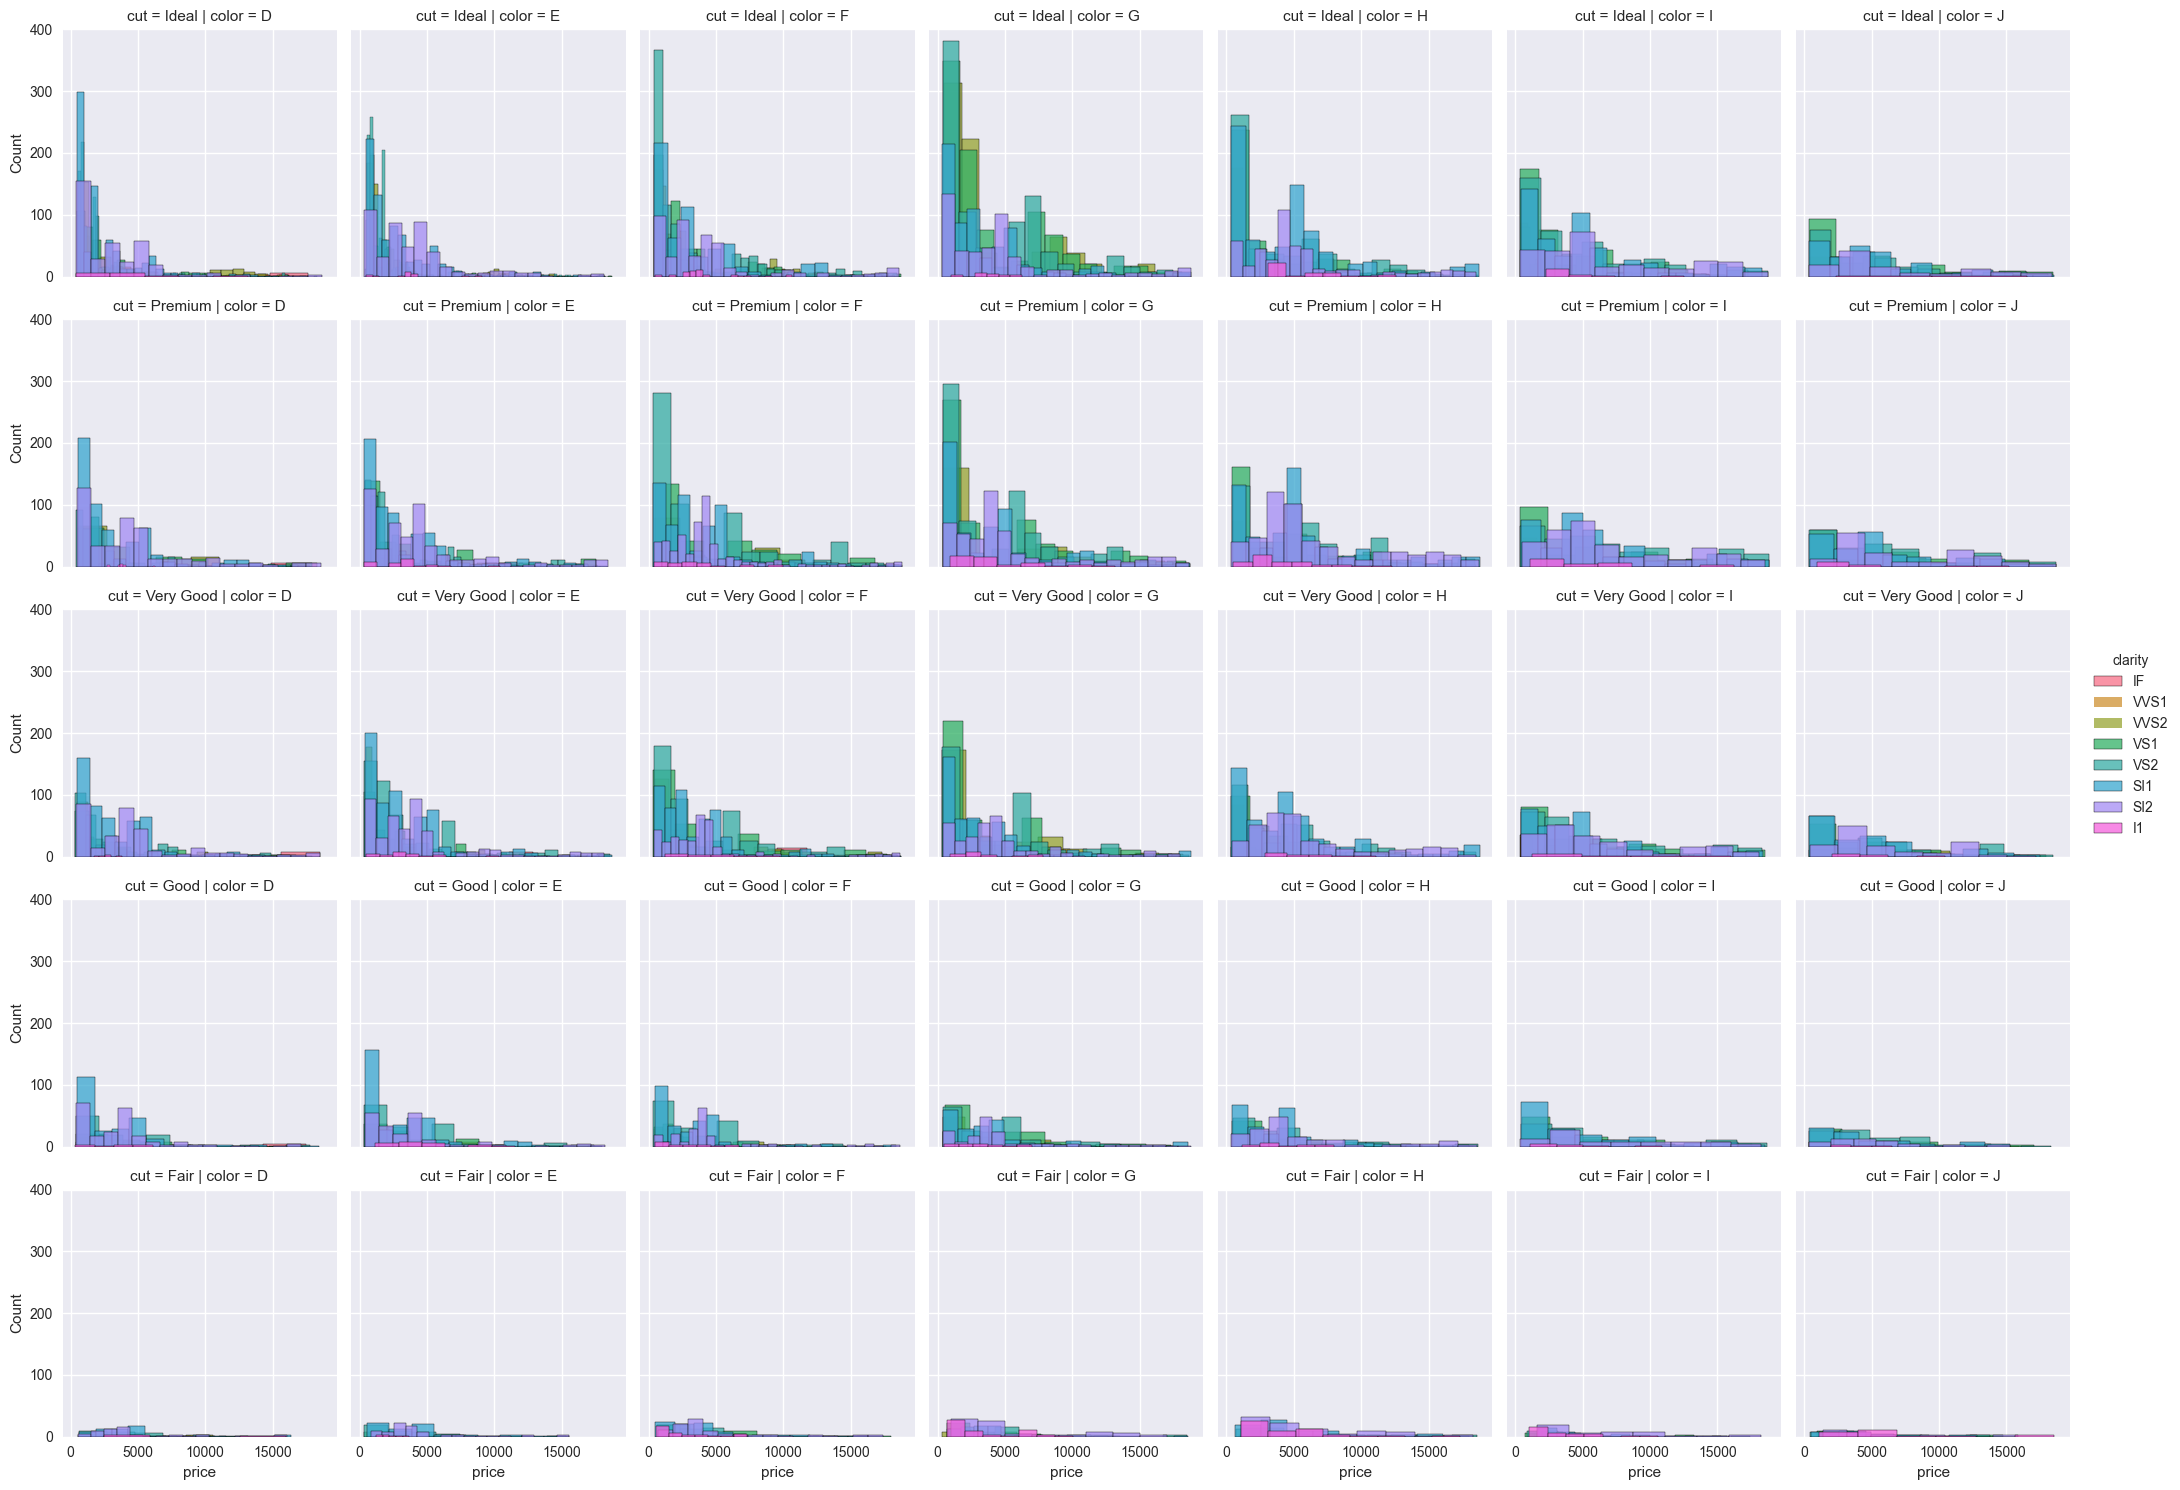

In [27]:
g = sns.FacetGrid(df, row='cut', col='color', hue='clarity')
g.map(sns.histplot, 'price')

g.add_legend()

**Урок 4. Стилизация графиков seaborn**

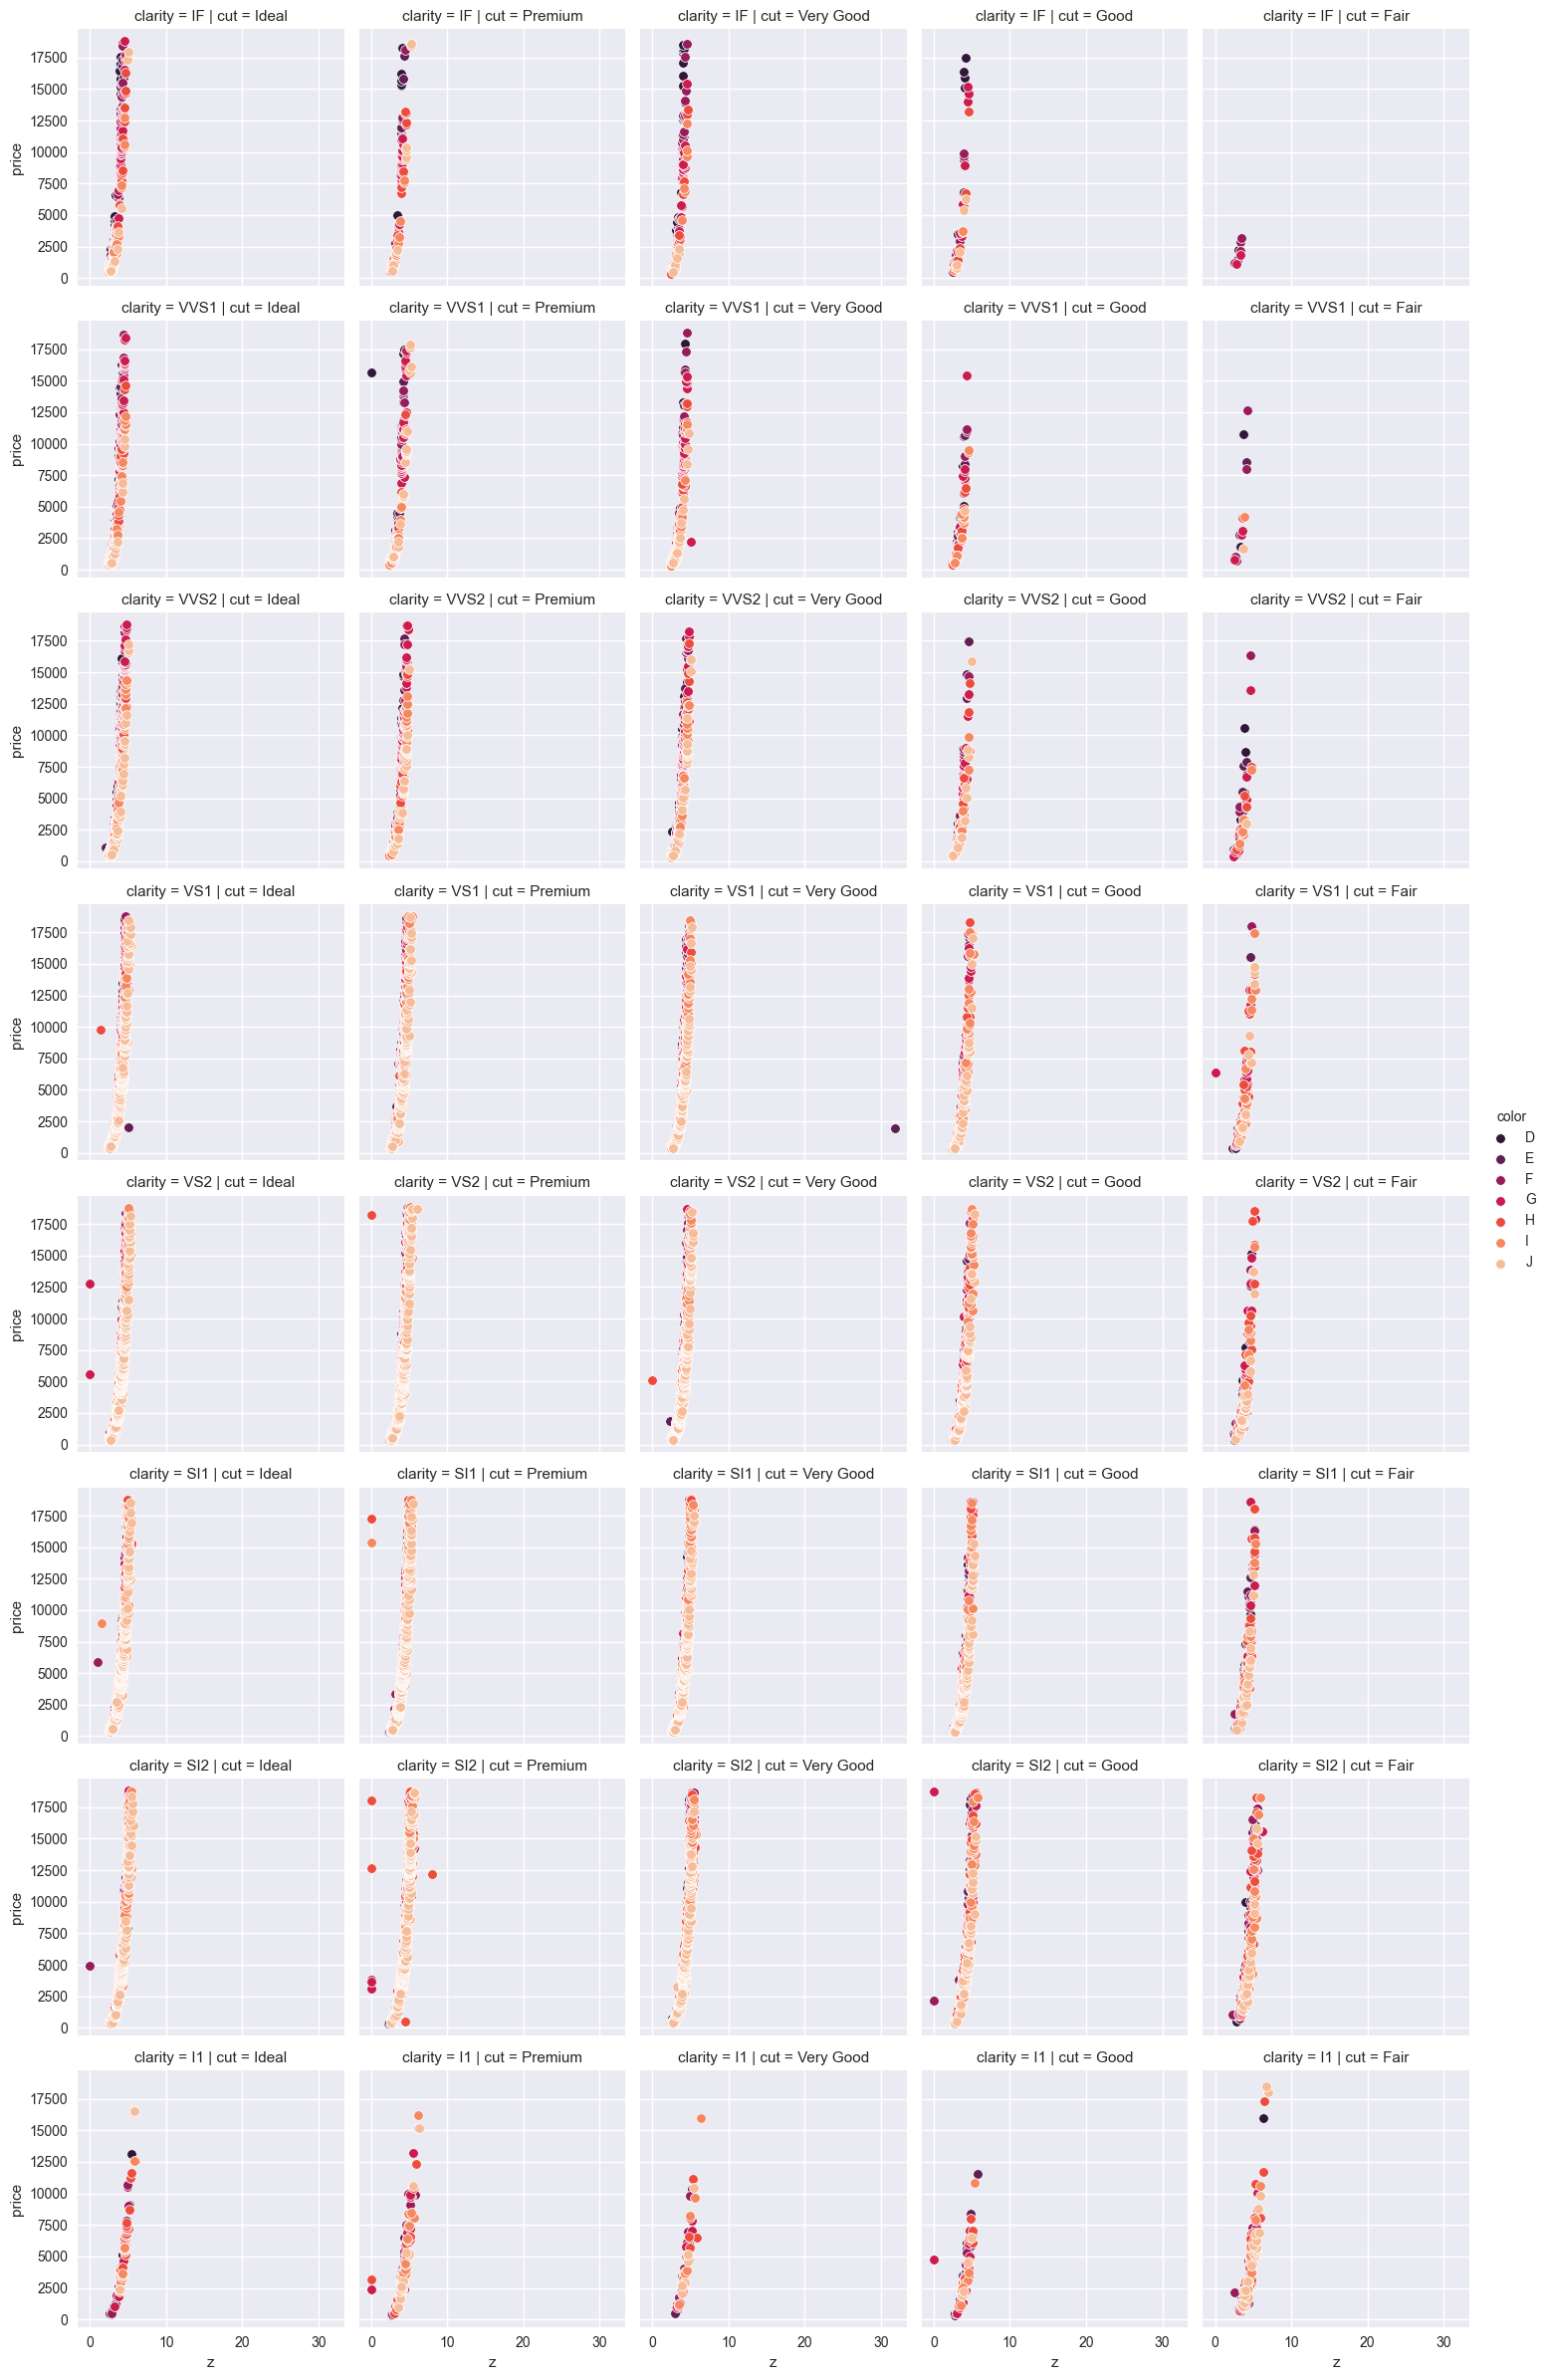

In [32]:
g = sns.FacetGrid(df, row='clarity', col='cut', hue='color', palette='rocket')
g.map(sns.scatterplot, 'z', 'price')

g.add_legend()

In [30]:
sns.color_palette('husl', 7)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.7757319041862729, 0.5784925270759935, 0.19475566538551875),
 (0.5105309046900421, 0.6614299289084904, 0.1930849118538962),
 (0.20433460114757862, 0.6863857739476534, 0.5407103379425205),
 (0.21662978923073606, 0.6676586160122123, 0.7318695594345369),
 (0.5049017849530067, 0.5909119231215284, 0.9584657252128558),
 (0.9587050080494409, 0.3662259565791742, 0.9231469575614251)]

In [31]:
sns.color_palette('rocket', 7)

[(0.18643324, 0.09165431, 0.22699705),
 (0.38092887, 0.12061482, 0.32506528),
 (0.59096382, 0.10810205, 0.35847347),
 (0.7965014, 0.10506637, 0.31063031),
 (0.92676657, 0.29823282, 0.24285536),
 (0.95922872, 0.53307513, 0.3748895),
 (0.96592829, 0.73844258, 0.60053991)]

C:\Windows\Temp\ipykernel_8416\1934163021.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='color', y='price', ci=None, palette='dark', saturation=200, linewidth=5, edgecolor='black')


<AxesSubplot: xlabel='color', ylabel='price'>

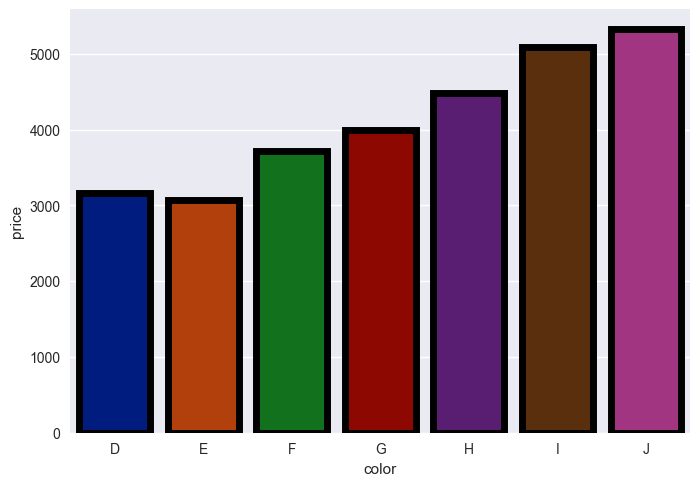

In [37]:
sns.barplot(data=df, x='color', y='price', ci=None, palette='dark', saturation=200, linewidth=5, edgecolor='black')